<h1>Widget Pricing</h1>

<a href='https://fivethirtyeight.com/features/how-many-sets-of-cards-can-you-find/'>Source</a>

<p>A manager is trying to produce sales of his company’s widget, so he instructs his team to hold a sale every morning, lowering the price of the widget by 10 percent. However, he gives very specific instructions as to what should happen in the afternoon: Increase the price by 10 percent from the sale price, with the (incorrect) idea that it would return it to the original price. The team follows his instructions quite literally, lowering and then raising the price by 10 percent every day.
<br><br>
After N days, the manager walks through the store in the evening, horrified to see that the widgets are marked <strong>more than 50 percent off</strong> of their original price. What is the smallest possible value of N?</p>

<h2>Simplify &amp; Sovle for $x$</h2>

<p>Mathematically we can simplify and solve for $x$:</p>
$$.5 = (1\times.9\times1.1)^x$$<br>
$$log(.5) = x\cdot{log(.99)}$$<br>
$$\frac {log(.5)}{log(.99)} = x$$<br>
$$x = 68.9676\space days$$ 

In [1]:
import matplotlib.pylab as plt

In [2]:
import numpy as np

In [3]:
np.log10(.5)/np.log10(.99)

68.96756393652844

<p>If the markdowns and markups happened using fractional cents then the widgets price would exactly equal $50\%$ of it's original in 68.97 days, therefore the first day the widget would be marked more than $50\%$ off is the end of the 69th day</p>

<h2>Two-digit rounding</h2>

<p>In the real world people cannot pay for widgets with fractional cents. Therefore the problem needs constraint to two decimal places. This significantly alters the behavior of the maximum and minimum number of days for the price to converge at <strong>more than 50 percent off</strong>.</p>

In [4]:
# ensures that the price is always rounded to 2 decimal places
def price_adjustment(x):
    return round(x*.99,2)

In [5]:
# checks to see if the current price is less than or equal to 50 percent of the original price
def price_check(original_price, current_price):
    if current_price >= .5*original_price:
        return True
    else:
        return False

<h3>$1 or less and it never goes below 50 percent off</h3>

<p>If the widget is priced at $1 or less the price will never decrease below 50 percent of it's original price because 2 digit rounding will prevent it from decreasing to a value below .5</p>

In [6]:
start_price = 1.01
end_price = 100

In [7]:
# evaluate each potential widget price between 1.01 and 100, for thoroughness
prices = np.linspace(start_price, end_price, (end_price-start_price)*100+1)

In [8]:
prices

array([  1.01,   1.02,   1.03, ...,  99.98,  99.99, 100.  ])

In [9]:
store = {}
store_prices = {}
for price in prices:
    eod_prices = []
    new_price = price_adjustment(price)
    while price_check(price, new_price):
        eod_prices.append(new_price)
        new_price = price_adjustment(new_price)
    eod_prices.append(new_price)
    store[price] = len(eod_prices)
    store_prices[price] = eod_prices

In [10]:
lists = sorted(store.items())
x, y = zip(*lists)

In [11]:
min(y)

51

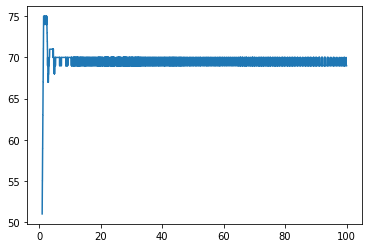

In [12]:
plt.plot(x, y)
plt.show()

In [13]:
store

{1.01: 51,
 1.02: 52,
 1.03: 52,
 1.04: 53,
 1.05: 53,
 1.06: 54,
 1.07: 54,
 1.08: 55,
 1.09: 55,
 1.1: 56,
 1.11: 56,
 1.12: 57,
 1.13: 57,
 1.1400000000000001: 57,
 1.15: 58,
 1.16: 59,
 1.17: 59,
 1.18: 60,
 1.19: 60,
 1.2: 61,
 1.21: 61,
 1.22: 62,
 1.23: 62,
 1.24: 63,
 1.25: 63,
 1.26: 64,
 1.27: 64,
 1.28: 65,
 1.29: 65,
 1.3: 66,
 1.31: 66,
 1.32: 67,
 1.33: 67,
 1.34: 68,
 1.35: 68,
 1.36: 69,
 1.37: 69,
 1.38: 70,
 1.3900000000000001: 70,
 1.4: 71,
 1.4100000000000001: 71,
 1.42: 72,
 1.43: 72,
 1.44: 73,
 1.45: 73,
 1.46: 74,
 1.47: 74,
 1.48: 75,
 1.49: 75,
 1.5: 75,
 1.51: 75,
 1.52: 75,
 1.53: 75,
 1.54: 75,
 1.55: 75,
 1.56: 75,
 1.57: 75,
 1.58: 75,
 1.5899999999999999: 75,
 1.6: 75,
 1.6099999999999999: 75,
 1.62: 75,
 1.63: 75,
 1.6400000000000001: 74,
 1.65: 75,
 1.6600000000000001: 74,
 1.67: 75,
 1.6800000000000002: 74,
 1.69: 75,
 1.7000000000000002: 74,
 1.71: 75,
 1.72: 75,
 1.73: 75,
 1.74: 75,
 1.75: 75,
 1.76: 75,
 1.77: 75,
 1.78: 75,
 1.79: 75,
 1.8: 75,
 